<a href="https://colab.research.google.com/github/crdguez/aprendiendo_sympy/blob/master/inecuaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Si usas [https://colab.research.google.com/](https://colab.research.google.com/) , necesitarás instalar los siguientes paquetes si quieres usar la función *parse_latex* que sirve para introducir expresiones directamente en $ \LaTeX $:

In [3]:
!pip install sympy==1.3 antlr4-python3-runtime


    100% |████████████████████████████████| 112kB 3.8MB/s 
  Running setup.py bdist_wheel for antlr4-python3-runtime ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ef/f6/18/ad300e691236a3408a99edc750484b56e8d6b11b2c38eacb10
Successfully built antlr4-python3-runtime


Lo primero que necesitamos hacer es importar la librerias de *Python* que necesitaremos

In [0]:
from sympy import *
from IPython.display import Markdown as md
from IPython.display import display
from sympy import solve_poly_inequality, reduce_abs_inequality
from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities
from sympy.parsing.latex import parse_latex

from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing(use_latex=False)

## Resolviendo inecuaciones

### Inecuaciones polinómicas

Son del siguiente tipo o similar: $$P(X) \leq 0$$

Podemos utilizar *solve_univariate_inequality*. Hay que pasar los parámetros:

* inecuación
* incognita
* Cómo se quiere la solución
    - Notación de desigualdad. Por defecto
    - Notación de conjuntos de números (intervalos): *relational = False*



#### Ejemplo:

Resolver $5x - 3 \leqslant 7 - 2x$


In [0]:
solve_univariate_inequality(5*x-3<=7-2*x,x, relational=False)

(-∞, 10/7]

Algunas inecuaciones dan errores por lo que se puede utilizar *reduce_rational_inequalities*. Observa que hay que escribir la inecuación dentro de *[[]]*

In [0]:
reduce_rational_inequalities([[5*x-3<=7-2*x]],x).as_set()

(-∞, 10/7]

Sin embargo, si intentamos con *solve_univariate_inequality* la ecuación: $$- 6 x \left(\frac{x}{4} - \frac{1}{4}\right) + 3 x + 30 < x \left(- 1.5 x + 6.0\right)$$ Obtenemos:

In [0]:
solve_univariate_inequality([[3*(x - 2*(x*((x - 1)/4) - 5)) < (3/2)*(-x + 4)*x]],x).as_set()

AttributeError: 'list' object has no attribute 'xreplace'

Sin embargo:

In [0]:
reduce_rational_inequalities([[3*(x - 2*(x*((x - 1)/4) - 5)) < (3/2)*(-x + 4)*x]],x).as_set()

(20.0, ∞)

### Inecuaciones con fracciones algebraicas

Con *reduce_rational_inequalities*. Parámetros:

* inecuaciones: Observa que hay que escribir la inecuación dentro de *[[]]*
* incognita
* Cómo se quiere la solución
    - Notación de desigualdad. Por defecto
    - Notación de conjuntos de números (intervalos): *relational = False*

#### Ejemplo: 

Resolver $\frac{{x + 1}}{{x + 3}} < 2$



In [0]:
reduce_rational_inequalities([[(x + 1)/(x + 3) < 2]],x,relational=False)

(-∞, -5) ∪ (-3, ∞)

### Sistemas de inecuaciones con una incognita

Podemos usar, de nuevo, *reduce_rational_inequalities*:

#### Ejemplo:

$$\left\{\begin{matrix}3x - 5 \leq 0\\2x + 8 \geq 0\end{matrix}\right.$$


In [0]:
reduce_rational_inequalities([[3*x-5<=0, 2*x+8>=0]],x,relational=False)

[-4, 5/3]

### Inecuaciones con dos incognitas

Podemos usar *plot_implicit*. Para inecuaciones lo hace bien, pero para Sistemas mediante la conjunción *And* no lo hace correctamente. Hay un bug en SymPy que esperemos se solucione.

Los parámetros son:

* expresión: Ecuación, inecuación o sistemas mediante la conjunción *And*
* parámetros adicionales: título, etc (ver documentación de Sympy)

#### Ejemplo:

$$x+y-2>0$$


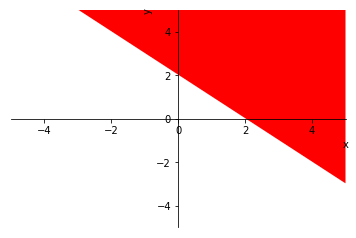

In [0]:
plot_implicit(x+y-2>0, line_color = 'r')

#### Ejemplo:

$$x+y=2$$

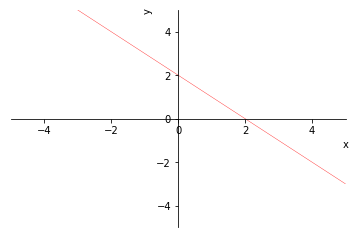

In [0]:
plot_implicit(x+y-2, line_color = 'r')

#### Ejemplo (Bug en Sympy, lo hace mal ):

$$\left\{\begin{matrix}x + y \leq 2 \\ x - y \geq 0\end{matrix}\right.$$

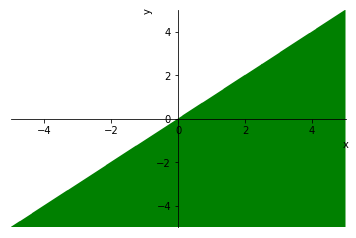

In [0]:
plot_implicit(And(x+y<=2,x-y>0), line_color = 'g')

### Inecuaciones con  valores absolutos
Para poder resolver inecuaciones con valores absolutos hay que utilizar la función *reduce_abs_inequality*.

La función recibe tres parámetros. Resuelve inecuaciones con el miembro de la derecha igual a 0. Por lo tanto hay que pasar:


*   La expresión algebraica del miembro de la izquierda
*   El símbolo de la desigualdad
*   La variable, normalmente x

#### Ejemplo:

Resuelve la inecuación $$\lvert x-2 \rvert \leq 1 $$


La inecuación anterior es equivalente a $\lvert x-2 \rvert -1 \leq 0$  y se resuelve con el siguiente código:




In [0]:
reduce_abs_inequality(Abs(x-2)-1,'<=',x).as_set()

[1, 3]

## Referencias


 *   [Documentación de SymPy](https://docs.sympy.org/latest/index.html#)


In [0]:
!jupyter nbconvert inecuaciones.ipynb --to=markdown